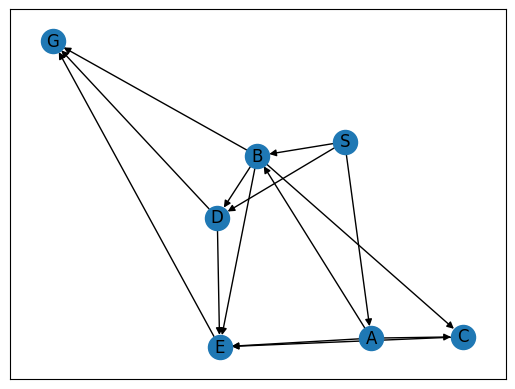

In [ ]:
import networkx as nx

g = nx.DiGraph()
edges = {'S':'ABD','A':'BCE','B':'CDEG','C':'E','D':'EG','E':'G'}
edge_list = []
for s in edges.keys():
  for c in edges[s]:
    edge_list.append((s,c))
g.add_edges_from(edge_list)
nx.draw_networkx(g)

# BFS

In [ ]:
last_index = 0
visited_node = []

def gen_successors(node):
    global last_index
    graph = {'S':'ABD','A':'BCE','B':'CDEG','C':'E','D':'EG','E':'G'}
    node_id = node[1]
    level = node[3]
    ret = []
    for c in graph[node[0]]:
        ret += [(c,last_index+1,node[1],node[3]+1)]
        last_index += 1
    return ret

def is_goal(node):
    return node[0] == 'G'

def insert_all(node,fringe):
    children = gen_successors(node)
    for child in children:
        fringe.append(child)
    # print(fringe)

def show_result(g):
    global visited_node
    current_node = g
    parent_index = current_node[1]
    while True:
        print(current_node[0],end=' ')
        parent_index = current_node[2]
        if parent_index == -1:
            break
        current_node = visited_node[parent_index]

def bfs(start_node,limited_level):
    global last_index
    global visited_node
    last_index = 0
    fringe = [start_node]
    print(fringe)
    visited_node = {}
    while True:
        if len(fringe) == 0:
            print('Not Found')
            break
        front = fringe[0]
        visited_node[front[1]] = front
        fringe = fringe[1:]
        if is_goal(front):
            show_result(front)
            return True
        if front[3] == limited_level:
            continue
        insert_all(front,fringe)

bfs(('S',0,-1,0),30)



[('S', 0, -1, 0)]
G B S 

True

# DFS

In [ ]:
last_index = 0
visited_node = []

def gen_successors(node):
    global last_index
    graph = {'S':'ABD','A':'BCE','B':'CDEG','C':'E','D':'EG','E':'G'}
    node_id = node[1]
    level = node[3]
    ret = []
    for c in graph[node[0]]:
        ret += [(c,last_index+1,node[1],node[3]+1)]
        last_index += 1
    return ret

def is_goal(node):
    return node[0] == 'G'

def insert_all(node,fringe):
    children = gen_successors(node)
    for child in children:
        fringe[0:0] = [child]
    # print(fringe)

def show_result(g):
    global visited_node
    current_node = g
    parent_index = current_node[1]
    while True:
        print(current_node[0],end=' ')
        parent_index = current_node[2]
        if parent_index == -1:
            break
        current_node = visited_node[parent_index]

def dfs(start_node,limited_level):
    global last_index
    global visited_node
    last_index = 0
    fringe = [start_node]
    print(fringe)
    visited_node = {}
    while True:
        if len(fringe) == 0:
            print('Not Found')
            break
        front = fringe[0]
        visited_node[front[1]] = front
        fringe = fringe[1:]
        if is_goal(front):
            show_result(front)
            return True
        if front[3] == limited_level:
            continue
        insert_all(front,fringe)

dfs(('S',0,-1,0),30)



[('S', 0, -1, 0)]
G D S 

True

# IDS

In [ ]:
last_index = 0
visited_node = []

def gen_successors(node):
    global last_index
    graph = {'S':'ABD','A':'BCE','B':'CDEG','C':'E','D':'EG','E':'G'}
    node_id = node[1]
    level = node[3]
    ret = []
    for c in graph[node[0]]:
        ret += [(c,last_index+1,node[1],node[3]+1)]
        last_index += 1
    return ret

def is_goal(node):
    return node[0] == 'G'

def insert_all(node,fringe):
    children = gen_successors(node)
    for child in children:
        fringe[0:0] = [child]
    print(fringe)

def show_result(g):
    global visited_node
    current_node = g
    parent_index = current_node[1]
    while True:
        print(current_node[0],end=' ')
        parent_index = current_node[2]
        if parent_index == -1:
            break
        current_node = visited_node[parent_index]

def dfs(start_node,limited_level):
    global last_index
    global visited_node
    last_index = 0
    fringe = [start_node]
    print(fringe)
    visited_node = {}
    while True:
        if len(fringe) == 0:
            print('Not Found')
            break
        front = fringe[0]
        visited_node[front[1]] = front
        fringe = fringe[1:]
        if is_goal(front):
            show_result(front)
            return True
        if front[3] == limited_level:
            continue
        insert_all(front,fringe)

for i in range(100):
    print('Limit at level '+str(i))
    if dfs(('S',0,-1,0),i):
        break


Limit at level 0
[('S', 0, -1, 0)]
Not Found
Limit at level 1
[('S', 0, -1, 0)]
[('D', 3, 0, 1), ('B', 2, 0, 1), ('A', 1, 0, 1)]
Not Found
Limit at level 2
[('S', 0, -1, 0)]
[('D', 3, 0, 1), ('B', 2, 0, 1), ('A', 1, 0, 1)]
[('G', 5, 3, 2), ('E', 4, 3, 2), ('B', 2, 0, 1), ('A', 1, 0, 1)]
G D S 

# IDS for 8-Puzzle

HW หาจำนวน Node ที่ถูก remove จาก front ของ fringe ของวิธี BFS เทียบกับ IDS ของปัญหา 8 Puzzle เซลล์ด้านล่างนี้เป็นเซลล์ของ IDS ให้แก้โปรแกรมเพื่อหาจำนวน Node ที่ถูก remove และถูก insert เข้าไปใน fringe

# My code IDS for 8-Puzzle

In [16]:
last_index = 0
count_removed = 0  # Counter for nodes removed from the fringe
count_inserted = 0  # Counter for nodes inserted into the fringe

def gen_successors(node):
    global last_index
    node_id = node[1]
    level = node[3]
    ret = []
    state = node[0]
    loc = int(state[0])
    puzzle = state[1:]
    if loc % 3 != 0:
        new_state = str(loc-1) + puzzle[:loc-1] + puzzle[loc] + puzzle[loc-1] + puzzle[loc+1:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
    if (loc+1) % 3 != 0:
        new_state = str(loc+1) + puzzle[:loc] + puzzle[loc+1] + puzzle[loc] + puzzle[loc+2:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
    if loc >= 3:
        new_state = str(loc-3) + puzzle[:loc-3] + puzzle[loc] + puzzle[loc-2:loc] + puzzle[loc-3] + puzzle[loc+1:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
    if loc <= 5:
        new_state = str(loc+3) + puzzle[:loc] + puzzle[loc+3] + puzzle[loc+1:loc+3] + puzzle[loc] + puzzle[loc+4:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
    return ret

def is_goal(node):
    return node[0] == '8123456780'

def insert_all(node,fringe):
    global count_inserted
    children = gen_successors(node)
    for child in children:
        fringe[0:0] = [child]
        count_inserted += 1

def show_result(g,visited_node):
    current_node = g
    parent_index = current_node[1]
    while True:
        print(current_node[0][1:4])
        print(current_node[0][4:7])
        print(current_node[0][7:])
        print()
        parent_index = current_node[2]
        if parent_index == -1:
            break
        current_node = visited_node[parent_index]

def dfs(start_node,limited_level):
    global last_index, count_removed, count_inserted
    last_index = 0
    fringe = [start_node]
    count_inserted += 1  # Count the initial node (start node)
    visited_node = {}
    while True:
        if len(fringe) == 0:
            print('Not Found')
            break
        front = fringe[0]
        visited_node[front[1]] = front
        fringe = fringe[1:]
        count_removed += 1  # Count the number of nodes removed from the fringe
        if is_goal(front):
            show_result(front,visited_node)
            return True
        if front[3] == limited_level:
            continue
        insert_all(front,fringe)

for i in range(14):
    print("Limit Search at level "+str(i+1))
    if dfs(('8413256780',0,-1,0),i):
        break

print(f"Nodes inserted: {count_inserted}")
print(f"Nodes removed: {count_removed}")



Limit Search at level 1
Not Found
Limit Search at level 2
Not Found
Limit Search at level 3
Not Found
Limit Search at level 4
Not Found
Limit Search at level 5
Not Found
Limit Search at level 6
Not Found
Limit Search at level 7
Not Found
Limit Search at level 8
Not Found
Limit Search at level 9
123
456
780

123
450
786

123
405
786

103
425
786

013
425
786

413
025
786

413
205
786

413
250
786

413
256
780

Nodes inserted: 4685
Nodes removed: 4678


# Hint

In [ ]:
data=[1,2,3,4,5,6,7]
data.pop(-1)
data

[1, 2, 3, 4, 5, 6]

In [ ]:
data.insert(0,'a')
data.insert(-1,'b') # inser before pos -1
data.append('c')
data

['a', 1, 2, 3, 4, 5, 'b', 6, 'c']

In [ ]:
data[:-1]

['a', 1, 2, 3, 4, 5, 'b', 6]

# BFS 8 Puzzle

HW แก้โปรแกรมเพื่อหาจำนวน Node ที่ถูก remove จาก fringe และจำนวน Node ที่ถูกใส่เข้าไปใน fringe

# My code for BFS 8 Puzzle

In [20]:
last_index = 0
count_insert = 0
count_remove = 0

def gen_successors(node):
    global last_index
    node_id = node[1]
    level = node[3]
    ret = []
    state = node[0]
    loc = int(state[0])
    puzzle = state[1:]
    if loc % 3 != 0:
        new_state = str(loc-1) + puzzle[:loc-1] + puzzle[loc] + puzzle[loc-1] + puzzle[loc+1:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('L'+new_state)
    if (loc+1) % 3 != 0:
        new_state = str(loc+1) + puzzle[:loc] + puzzle[loc+1] + puzzle[loc] + puzzle[loc+2:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('R'+new_state)
    if loc >= 3:
        new_state = str(loc-3) + puzzle[:loc-3] + puzzle[loc] + puzzle[loc-2:loc] + puzzle[loc-3] + puzzle[loc+1:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('U'+new_state)
    if loc <= 5:
        new_state = str(loc+3) + puzzle[:loc] + puzzle[loc+3] + puzzle[loc+1:loc+3] + puzzle[loc] + puzzle[loc+4:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('D'+new_state)
    return ret

def is_goal(node):
    return node[0] == '8123456780'

def insert_all(node,fringe):
    global count_insert
    children = gen_successors(node)
    for child in children:
        fringe.append(child)
        count_insert += 1
    # print(fringe)

def show_result(g,visited_node):
    current_node = g
    parent_index = current_node[1]
    while True:
        print(current_node[0][1:4])
        print(current_node[0][4:7])
        print(current_node[0][7:])
        print()
        parent_index = current_node[2]
        if parent_index == -1:
            break
        current_node = visited_node[parent_index]

def bfs(start_node):
    global last_index
    global count_insert
    global count_remove
    last_index = 0
    fringe = [start_node]
    count_insert +=1
    visited_node = {}
    while True:
        if len(fringe) == 0:
            print('Not Found')
            break
        front = fringe[0]
        visited_node[front[1]] = front
        fringe = fringe[1:]
        count_remove += 1
        if is_goal(front):
            show_result(front,visited_node)
            return True
        insert_all(front,fringe)

bfs(('8413256780',0,-1,0))


print(f"Node Insert {count_insert} nodes")
print(f"Node Remove {count_remove} nodes")

123
456
780

123
456
708

123
406
758

103
426
758

013
426
758

413
026
758

413
206
758

413
256
708

413
256
780

Node Insert 7043 nodes
Node Remove 2496 nodes
